Linear Regression in one dimension by PyTorch

$y = wx+b$

$y$ is our target  
$x$ is our features  
$b$ is bias  
$w$ is weight  

linear regression work base on the below rules:

In [8]:
import torch

w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

def forward(x): #which is used for prediction
    y = w*x+b
    return y

# example
x1 = torch.tensor([1.0])
yhat1 = forward(x1)


x2 = torch.tensor([[1],[2]])
yhat2 = forward(x2)


* `Forward step is known as the prediction step`  
* `Backward step is known as the learning step`

but For linear regression it is not necessary to define functions and we have classs and packages

In [11]:
from torch.nn import Linear # we have to import Linear from nn package

torch.manual_seed(1)
model = Linear(in_features=1,out_features=1) # in_feature is the size of the input features that hear is 1 and consequently the out features is the size of the out features
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [4]:
# example 
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([-0.4414], grad_fn=<AddBackward0>)

In [5]:
# example
x = torch.tensor([[1.0],[2.0]])
yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

Now we want to create a custom modul for the linear regression which is a class like this

In [17]:
import torch.nn as nn

class LR(nn.Module):
    def __init__(self,in_size,output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(in_size,output_size)

    def forward(self,x): # Forward modul is used for prediction step
        out = self.linear(x)
        return out

In [31]:
model = LR(1,1)
model.state_dict()['linear.weight'].data[0]=torch.tensor([0.3]) # which represents our w
model.state_dict()['linear.bias'].data[0]= torch.tensor([0.2]) # which represents our b
x = torch.tensor([[0.5],[ 0.3], [5]])
yhat =model(x)
yhat

tensor([[0.3500],
        [0.2900],
        [1.7000]], grad_fn=<AddmmBackward0>)

`loss function`   
In Linear regression the square value of the subtract the actual value and predicted value is called loss  
`the loss let you know how good your stimate is`   
Derivate of the loss function for reduce its value is practical when we work with small number of features and we have to know that this model is not good for deeplearning and complex problems.

`Gradient Descent`

Gradient Descent is a method to find the minimum of a function  
There are several ways to impelement gradient descent in PyTorch that we investigate them here

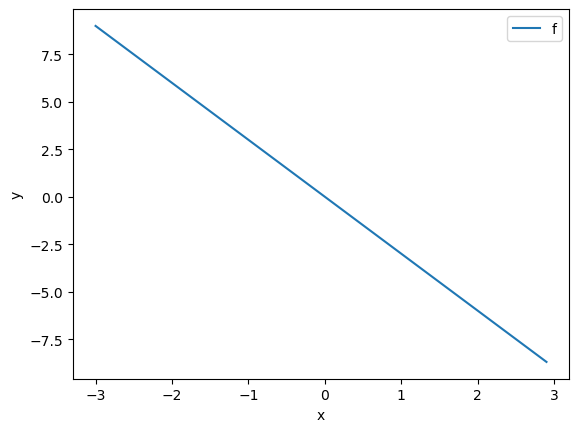

In [12]:
import torch 
import matplotlib.pyplot as plt
import numpy as np

w = torch.tensor(-10.0,requires_grad=True)
x = torch.arange(-3.0,3.0,0.1).view(-1,1)

f = -3*x

plt.plot(x.numpy(),f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [14]:
# now we want to add a little bit noise to f
Y = f+0.1*torch.randn(x.size())

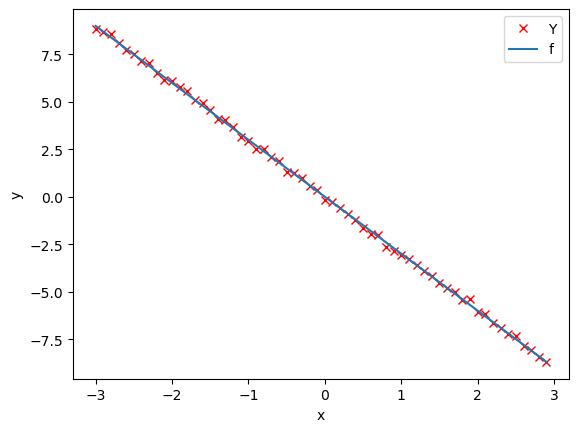

In [15]:
# Plot the Y versus x

plt.plot(x.numpy(), Y.numpy(), 'rx' , label='Y')
plt.plot(x.numpy(),f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

`Create the model and cost function`

In [18]:
# the value of the yhat is calculated in this way
def forward(x):
    return w*x

# Mean square error is calculated in this way as a cost function
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

# Learning rate (lr): Choosing an appropreate value for the learning rate is really important since otherwise 
# we miss the minimum for loss function (for large values of learning rate) or our loss change hardly due to the low values of the klearning rate.
lr = 0.1
LOSS = []

# Noe we choose a value for our parameter (w) and we setting the argument requires_grad to  True because the system must learn it.
w = torch.tensor(-10.0, requires_grad=True)


`Training the model`

In [21]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction as we learned in the last lab
        Yhat = forward(x)
        
        
        # calculate the iteration
        loss = criterion(Yhat,Y)
                
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # updata parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

In [22]:
train_model(4)

Text(38.097222222222214, 0.5, 'Cost')

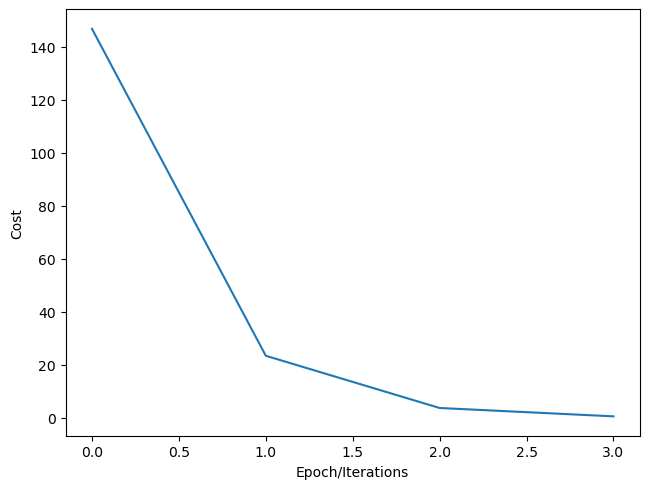

In [23]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

### `Linear Regression Training`

#### `Cost surface`   
The cost is the avarage loss or te total loss. Cost surface is a good method to understand how much this model is good.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
# The class `plot_error_surfaces` is just to help us visualize the data space and the parameter space during training and has nothing to do with PyTorch. 
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()


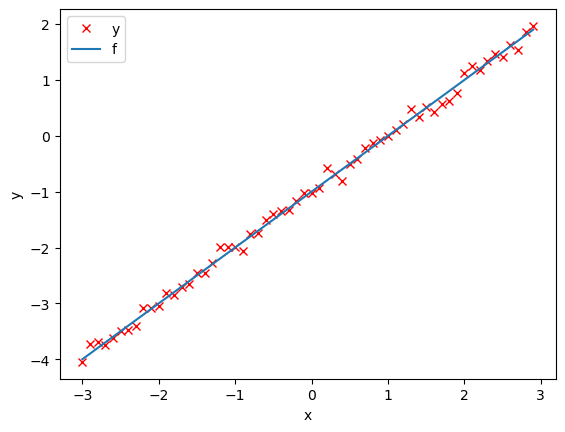

In [13]:
# make dataset
import torch
# create f(x) with slope 1 and bias -1
X = torch.arange(-3,3,0.1).view(-1,1)
f = 1*X-1

# add noise
Y = f+0.1*torch.randn(X.size())

# plot the line
plt.plot(X.numpy(),Y.numpy(), 'rx',label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


<Figure size 640x480 with 0 Axes>

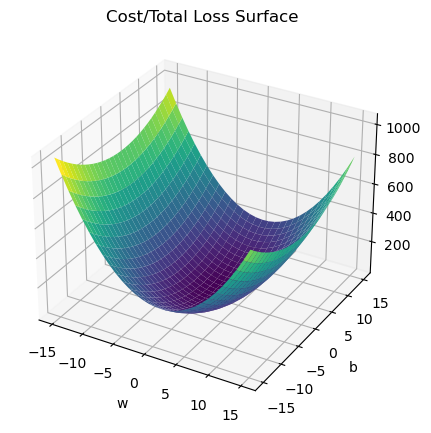

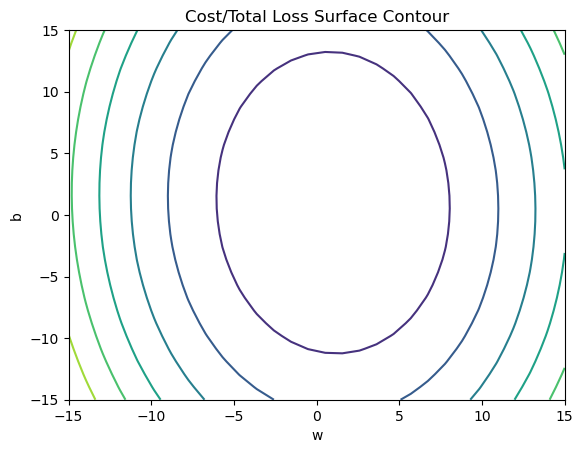

In [17]:
# now we want to make a model for descrining these red crosses

def forward(x):
    return w*x+b

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

get_surface = plot_error_surfaces(w_range=15,b_range=15,X=X,Y=Y,n_samples=30)

In [18]:
# now we want to train a model 

# we choos an array for weight and an array for bias
w = torch.tensor(-15.0,requires_grad=True)
b = torch.tensor(-10.0,requires_grad=True)

# Now we have to set a learning rate
lr = 0.1
LOSS = []

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

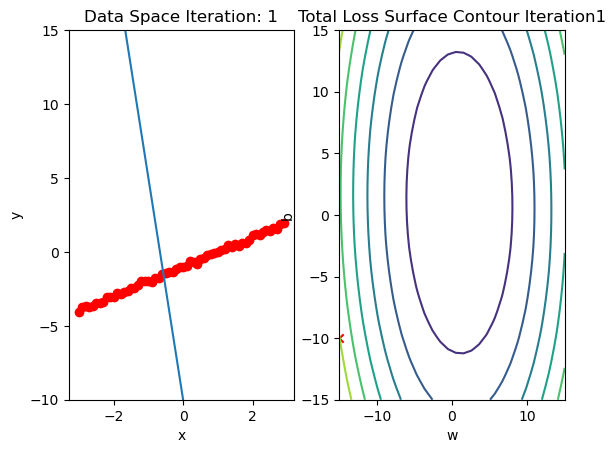

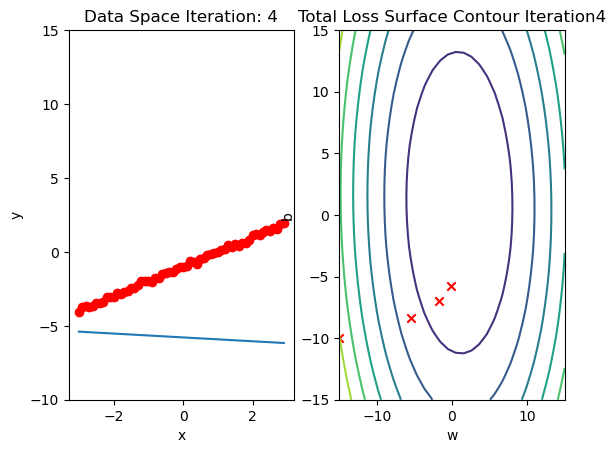

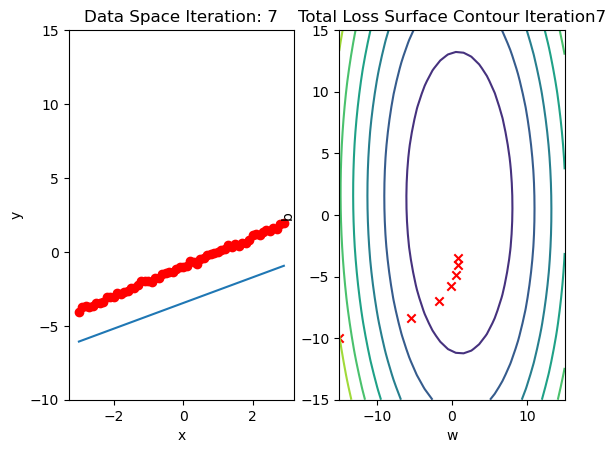

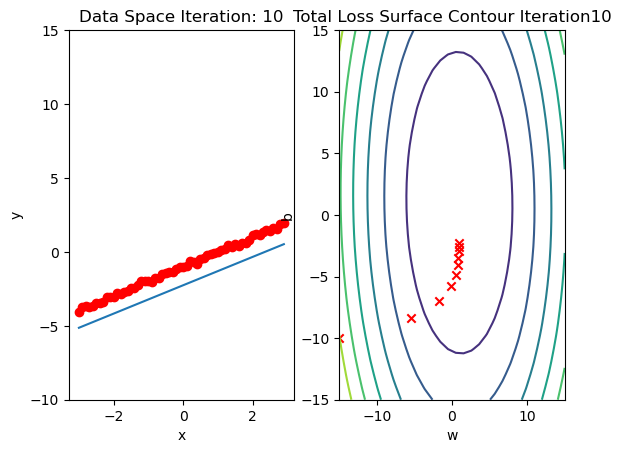

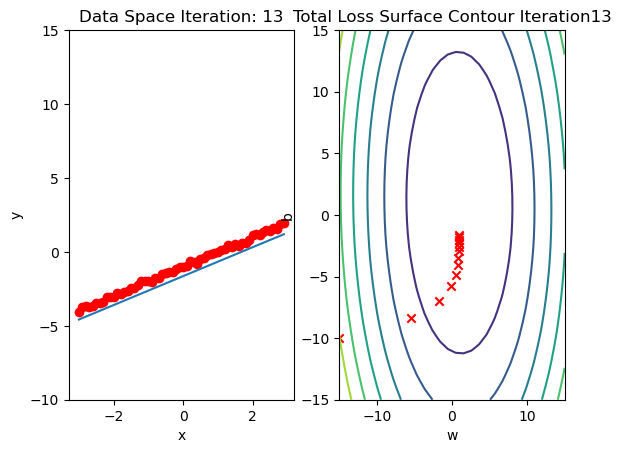

In [20]:
train_model(15)

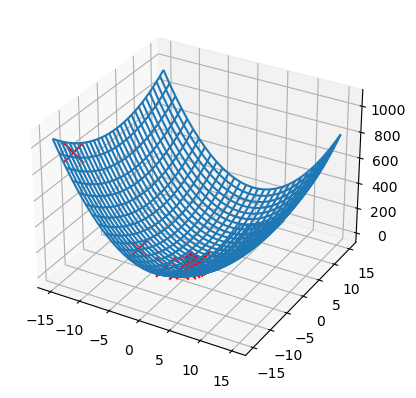

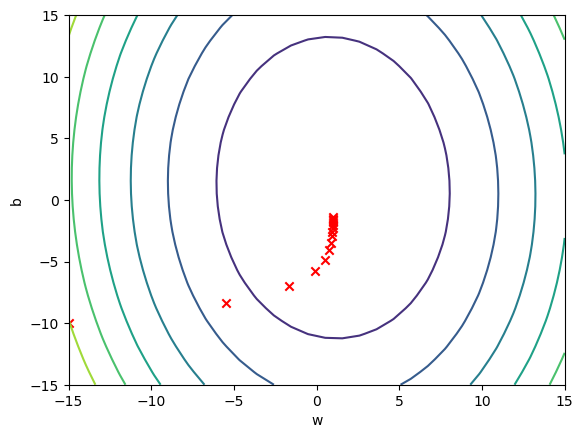

Text(38.097222222222214, 0.5, 'Cost')

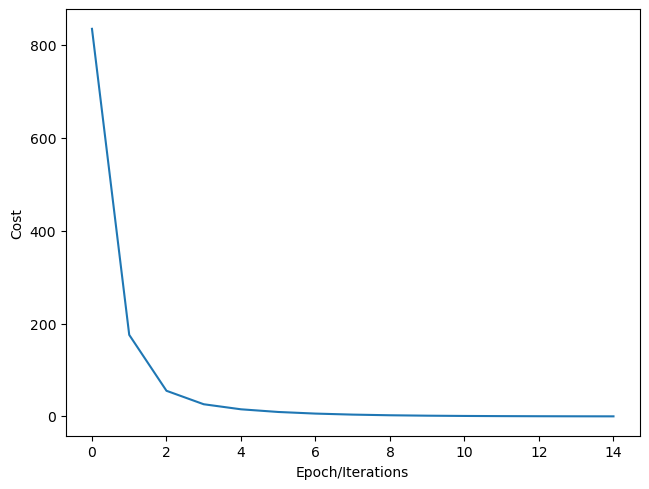

In [22]:
# Plot out the Loss Result

get_surface.final_plot()
LOSS= [ loss.detach().numpy() for loss in LOSS]
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")